Data Load

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import sys
from sklearn.model_selection import train_test_split
import os

file_path = os.path.dirname(os.getcwd())

import pandas as pd
import numpy as np
import pickle

# ========================================
# Load MovieLens 1M datasets
# ========================================
data_movies = pd.read_csv('./ml-1m/movies.dat', sep = "::", names = ['movieid','title','genres'], encoding_errors='ignore')
data_ratings = pd.read_csv('./ml-1m/ratings.dat', sep = "::", names = ['userid','movieid','ratings','timestamp'], encoding_errors='ignore')
data_users = pd.read_csv('./ml-1m/users.dat', sep = "::", names = ['userid','gender','age','occupation','zipcode'], encoding_errors='ignore')

C:\Users\kbw82\AppData\Local\Temp\ipykernel_12192\4076806534.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_movies = pd.read_csv('./ml-1m/movies.dat', sep = "::", names = ['movieid','title','genres'], encoding_errors='ignore')
C:\Users\kbw82\AppData\Local\Temp\ipykernel_12192\4076806534.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_ratings = pd.read_csv('./ml-1m/ratings.dat', sep = "::", names = ['userid','movieid','ratings','timestamp'], encoding_errors='ignore')
C:\Users\kbw82\AppData\Local\Temp\ipykernel_12192\4076806534.py:20: ParserWarning: Falling back to the 'python' engine

In [2]:
data_movies

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [3]:
# ========================================
# Wide Data
# ========================================

# One hot encoding for movie genres
genres_unique = np.unique(data_movies.genres.str.split('|').apply(lambda x: pd.Series(x)).stack())

movie_genres = data_movies.genres.str.split('|')
movie_genres_one_hot = pd.DataFrame(0, index=np.arange(len(data_movies)), columns = genres_unique)
for id, i in enumerate(movie_genres):
   for j in i:
      movie_genres_one_hot[j][id] = 1

data_movies = pd.concat([data_movies, movie_genres_one_hot], axis=1).drop(['genres'], axis = 1)

Merge data_movies, data_ratings, data_users

In [4]:
temp1 = pd.merge(data_ratings, data_users, how='outer', on = 'userid')
data_merge = pd.merge(data_movies,temp1, how = 'outer', on = 'movieid')
data_merge.dropna(inplace = True)

In [5]:
data_merge

,movieid,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Thriller,War,Western,userid,ratings,timestamp,gender,age,occupation,zipcode
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,1.0,5.0,9.788243e+08,F,1.0,10.0,48067
1,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,6.0,4.0,9.782370e+08,F,50.0,9.0,55117
2,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,8.0,4.0,9.782335e+08,M,25.0,12.0,11413
3,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,9.0,5.0,9.782260e+08,M,25.0,17.0,61614
4,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,10.0,5.0,9.782265e+08,F,35.0,1.0,95370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,3952,"Contender, The (2000)",0,0,0,0,0,0,0,1,...,1,0,0,5812.0,4.0,9.920721e+08,F,25.0,7.0,92120
1000382,3952,"Contender, The (2000)",0,0,0,0,0,0,0,1,...,1,0,0,5831.0,3.0,9.862231e+08,M,25.0,1.0,92120
1000383,3952,"Contender, The (2000)",0,0,0,0,0,0,0,1,...,1,0,0,5837.0,4.0,1.011903e+09,M,25.0,7.0,60607
1000384,3952,"Contender, The (2000)",0,0,0,0,0,0,0,1,...,1,0,0,5927.0,1.0,9.798525e+08,M,35.0,14.0,10003


Additional Feature Engineering

In [6]:
# Encode 0 if rating = 1,2,3 / Encode 1 if ratings = 4,5
data_merge.ratings = data_merge.ratings.astype('int')
data_merge.ratings = np.where(data_merge.ratings < 3.5 , 0, 1)

data_wide = data_merge.drop(['title','timestamp', 'zipcode', 'occupation'], axis = 1)

# gender, age data into categorical variable
data_wide.gender = np.where(data_wide.gender == 'F','female','male')
data_wide.age = np.where(data_wide.age < 30,'youth','adult')

# one-hot-encoding of age and gender
gender_one_hot = pd.get_dummies(data_wide['gender'], dtype=float)
age_one_hot = pd.get_dummies(data_wide['age'], dtype=float)
data_wide = pd.concat([data_wide, gender_one_hot, age_one_hot], axis = 1).drop(['gender', 'age'], axis = 1)

# cross-product transformation data of age and gender
data_wide['female-adult']= data_wide.female * data_wide.adult
data_wide['female-youth']= data_wide.female * data_wide.youth
data_wide['male-adult'] = data_wide.male * data_wide.adult
data_wide['male-youth'] = data_wide.male * data_wide.youth

data_wide = data_wide[['userid','movieid', 'Action', 'Adventure', 'Animation', "Children's",
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'female', 'male', 'adult', 'youth','female-adult', 'female-youth', 'male-adult', 'male-youth', 'ratings']]

with open("data_wide.pkl", "wb") as f:
    pickle.dump(data_wide, f)

print("")
print("###################################")
print("###### data_wide.pkl - Saved ######")
print("###################################")



###################################
###### data_wide.pkl - Saved ######
###################################


In [7]:
data_wide

,userid,movieid,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Western,female,male,adult,youth,female-adult,female-youth,male-adult,male-youth,ratings
0,1.0,1,0,0,1,1,1,0,0,0,...,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,6.0,1,0,0,1,1,1,0,0,0,...,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
2,8.0,1,0,0,1,1,1,0,0,0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,9.0,1,0,0,1,1,1,0,0,0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,10.0,1,0,0,1,1,1,0,0,0,...,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,5812.0,3952,0,0,0,0,0,0,0,1,...,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1000382,5831.0,3952,0,0,0,0,0,0,0,1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1000383,5837.0,3952,0,0,0,0,0,0,0,1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1000384,5927.0,3952,0,0,0,0,0,0,0,1,...,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [8]:
# ========================================
# Deep Data 
# one hot encoding for genres
# categorical vairable for gender, age, occupation
# ========================================
data_deep = data_merge.copy()
data_deep.drop(['timestamp','zipcode','title'], axis = 1, inplace = True)

# 열 순서 변경
data_deep = data_deep[['userid','movieid', 'Action', 'Adventure', 'Animation', "Children's",
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western',  'gender', 'age', 'occupation','ratings']]

# ========================================
# 범주형 데이터를 0부터 시작하는 정수형 카테고리로 변환
# ========================================
data_deep.age = data_deep.age.astype('category').cat.codes
data_deep.gender = data_deep.gender.astype('category').cat.codes
data_deep.occupation = data_deep.occupation.astype('category').cat.codes
data_deep.userid = data_deep.userid.astype('category').cat.codes
data_deep.movieid = data_deep.movieid.astype('category').cat.codes

with open("data_deep.pkl", "wb") as f:
    pickle.dump(data_deep, f)

print("")
print("###################################")
print("###### data_deep.pkl - Saved ######")
print("###################################")


###################################
###### data_deep.pkl - Saved ######
###################################


In [9]:
data_deep

,userid,movieid,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender,age,occupation,ratings
0,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,10,1
1,5,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,5,9,1
2,7,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,12,1
3,8,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,17,1
4,9,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,5811,3705,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,2,7,1
1000382,5830,3705,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,2,1,0
1000383,5836,3705,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,2,7,1
1000384,5926,3705,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,3,14,0


Model

In [10]:
import torch
import torch.nn as nn
import numpy as np

class WideAndDeep(nn.Module):

   def __init__(self, data_wide, data_deep):
      super(WideAndDeep, self).__init__()

      # Deep Model
      self.embed_gender = nn.Embedding(num_embeddings=len(np.unique(data_deep.gender)), embedding_dim=8)
      self.embed_age = nn.Embedding(num_embeddings=len(np.unique(data_deep.age)), embedding_dim=8)
      self.embed_occupation = nn.Embedding(num_embeddings=len(np.unique(data_deep.occupation)), embedding_dim=8)
      # As gender, age, occupation column will be replaced with embeddings
      self.len_genres = len(data_deep.columns) - 3
      
      self.Linear_1 = nn.Linear(in_features = 24 + self.len_genres, out_features = 64)
      self.Linear_2 = nn.Linear(in_features = 64, out_features = 32)
      self.Linear_3 = nn.Linear(in_features = 32, out_features = 16)

      # WideAndDeep Model
      self.Linear = nn.Linear(in_features = len(data_wide.columns)+ 16, out_features = 1)
      self.Logistic = nn.Sigmoid()

   def forward(self, X_wide, X_deep):

      # Deep Model 
      # Embedding genres except gender, age, occupation feature
      embedding_genres = X_deep[:,:-3]
      # third from the last is gender column
      embedding_gender = self.embed_gender(X_deep[:,-3])
      # second from the last is age column
      embedding_age = self.embed_age(X_deep[:,-2])
      # last column is occupation
      embedding_occupation = self.embed_occupation(X_deep[:,-1])

      input_deep = torch.cat([embedding_genres, embedding_gender, embedding_age, embedding_occupation], dim = 1)

      input_deep = self.Linear_1(input_deep)
      input_deep = nn.ReLU()(input_deep)
      input_deep = self.Linear_2(input_deep)
      input_deep = nn.ReLU()(input_deep)
      input_deep = self.Linear_3(input_deep)
      output_deep = nn.ReLU()(input_deep)

      # WideAndDeep 
      input_wad = torch.cat([X_wide,output_deep], dim = 1)
      logits = self.Linear(input_wad)
      out = self.Logistic(logits)

      return out

c:\Users\kbw82\Desktop\2024-DSAIL-Lab-Intern\labenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
class Deep(nn.Module):

   def __init__(self, data_wide, data_deep):
      super(Deep, self).__init__()

      # Deep Model
      self.embed_gender = nn.Embedding(num_embeddings=len(np.unique(data_deep.gender)), embedding_dim=8)
      self.embed_age = nn.Embedding(num_embeddings=len(np.unique(data_deep.age)), embedding_dim=8)
      self.embed_occupation = nn.Embedding(num_embeddings=len(np.unique(data_deep.occupation)), embedding_dim=8)
      # As gender, age, occupation column will be replaced with embeddings
      self.len_genres = len(data_deep.columns) - 3
      
      self.Linear_1 = nn.Linear(in_features = 24 + self.len_genres, out_features = 64)
      self.Linear_2 = nn.Linear(in_features = 64, out_features = 32)
      self.Linear_3 = nn.Linear(in_features = 32, out_features = 1)

      self.Logistic = nn.Sigmoid()

   def forward(self, X_wide, X_deep):

      # Deep Model 
      # Embedding genres except gender, age, occupation feature
      embedding_genres = X_deep[:,:-3]
      # third from the last is gender column
      embedding_gender = self.embed_gender(X_deep[:,-3])
      # second from the last is age column
      embedding_age = self.embed_age(X_deep[:,-2])
      # last column is occupation
      embedding_occupation = self.embed_occupation(X_deep[:,-1])

      input_deep = torch.cat([embedding_genres, embedding_gender, embedding_age, embedding_occupation], dim = 1)

      input_deep = self.Linear_1(input_deep)
      input_deep = nn.ReLU()(input_deep)
      input_deep = self.Linear_2(input_deep)
      input_deep = nn.ReLU()(input_deep)
      input_deep = self.Linear_3(input_deep)
      output_deep = nn.ReLU()(input_deep)

      out = self.Logistic(output_deep)

      return out

In [21]:
class Wide(nn.Module):

   def __init__(self, data_wide, data_deep):
      super(Wide, self).__init__()

      self.Linear = nn.Linear(in_features = len(data_wide.columns), out_features = 1)
      self.Logistic = nn.Sigmoid()

   def forward(self, X_wide, X_deep):
      
      out = self.Linear(X_wide)
      out = self.Logistic(out)

      return out

In [12]:
from torch.utils.data import Dataset, DataLoader

# ========================================
# Custom Dataset
# ========================================
class WDDataset(Dataset):
    def __init__(self, X_wide, X_deep, Y):
        self.X_wide = X_wide
        self.X_deep = X_deep
        self.Y = Y
        
    def __len__(self):
        return len(self.X_wide)
    
    def __getitem__(self, index):
        return self.X_wide[index], self.X_deep[index], self.Y[index]

Train

In [13]:
epochs = 100
lr = 0.01
batch_size = 200

In [14]:
# ========================================
# Load Dataset
# ========================================
with open('data_deep.pkl', 'rb') as f:
    data_deep = pickle.load(f)
    
with open('data_wide.pkl', 'rb') as f:
    data_wide = pickle.load(f)

_Y = data_wide.ratings
data_deep.drop(['ratings','userid','movieid'], axis=1, inplace = True)
data_wide.drop(['ratings','userid','movieid'], axis=1, inplace = True)

In [16]:
from torch import optim

# ========================================
# Preprocessing data
# ========================================

X_train_deep, X_test_deep = train_test_split(data_deep.values, test_size=0.3, random_state=100)
X_train_wide, X_test_wide = train_test_split(data_wide.values, test_size=0.3, random_state=100)
Y_train, Y_test = train_test_split(_Y, test_size=0.3, random_state=100)

X_train_deep_tensor = torch.LongTensor(X_train_deep)
X_train_wide_tensor = torch.FloatTensor(X_train_wide)
Y_train_tensor = torch.FloatTensor(Y_train.values)

X_test_deep_tensor = torch.LongTensor(X_test_deep)
X_test_wide_tensor = torch.FloatTensor(X_test_wide)
Y_test_tensor = torch.FloatTensor(Y_test.values)

data_train = WDDataset(X_train_wide_tensor, X_train_deep_tensor, Y_train_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
data_wide

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,War,Western,female,male,adult,youth,female-adult,female-youth,male-adult,male-youth
0,0,0,1,1,1,0,0,0,0,0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0,1,1,1,0,0,0,0,0,...,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,0,1,1,1,0,0,0,0,0,...,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0,1,1,1,0,0,0,0,0,...,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,0,0,0,0,0,0,0,1,0,0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1000382,0,0,0,0,0,0,0,1,0,0,...,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1000383,0,0,0,0,0,0,0,1,0,0,...,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1000384,0,0,0,0,0,0,0,1,0,0,...,0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
from sklearn.metrics import roc_auc_score
import time

# ========================================
# Train
# ========================================
def train(model):
   t = time.time()
   loss_list=[]
   auc_list = []   

   optimizer = optim.Adagrad(model.parameters(), lr = lr)
   criterion = nn.BCELoss()
   for epoch in range(epochs):
      train_loader = DataLoader(dataset = data_train, batch_size = batch_size, shuffle = True)
      model.train()
      total_loss = 0
      for batch_idx, batch in enumerate(train_loader):
         X_wide, X_deep, y = batch[0], batch[1], batch[2]
         X_wide, X_deep, y = X_wide.to(device), X_deep.to(device), y.to(device)

         optimizer.zero_grad()
         y_pred = model(X_wide,X_deep)
         loss = criterion(y_pred.squeeze(), y)
         loss.backward()
         optimizer.step()
         total_loss += loss
      
      model.eval()
      pred = model(X_test_wide_tensor.cuda(), X_test_deep_tensor.cuda())
      auc = roc_auc_score(Y_test, pred.cpu().detach().numpy())
      

      if((epoch+1) % 10 == 0) or epoch == 0:
         loss_list.append(total_loss)
         auc_list.append(auc)
         print(f'Iteration : {epoch+1} -- Total loss : {total_loss:.4f}, Test accuracy : {auc:.3f}, Time : {time.time()-t:.4f}')
   
   return loss_list, auc_list

In [22]:
wide_model = Wide(data_wide, data_deep).to(device)

In [23]:
wide_loss, wide_auc = train(wide_model)

Iteration : 1 -- Total loss : 2350.1680, Test accuracy : 0.593, Time : 4.8556
Iteration : 10 -- Total loss : 2339.6448, Test accuracy : 0.596, Time : 47.0751
Iteration : 20 -- Total loss : 2339.4792, Test accuracy : 0.596, Time : 93.7116
Iteration : 30 -- Total loss : 2339.4390, Test accuracy : 0.596, Time : 140.4315
Iteration : 40 -- Total loss : 2339.4465, Test accuracy : 0.596, Time : 187.7567
Iteration : 50 -- Total loss : 2339.4338, Test accuracy : 0.596, Time : 234.3030
Iteration : 60 -- Total loss : 2339.4387, Test accuracy : 0.596, Time : 309.3902
Iteration : 70 -- Total loss : 2339.4351, Test accuracy : 0.596, Time : 356.5670
Iteration : 80 -- Total loss : 2339.4231, Test accuracy : 0.596, Time : 403.3561
Iteration : 90 -- Total loss : 2339.4443, Test accuracy : 0.596, Time : 467.7797
Iteration : 100 -- Total loss : 2339.4307, Test accuracy : 0.596, Time : 515.9559


In [19]:
model = Deep(data_wide, data_deep).to(device)

In [20]:
deep_loss, deep_auc = train(model)

Iteration : 1 -- Total loss : 2336.4819, Test accuracy : 0.604, Time : 7.4471
Iteration : 10 -- Total loss : 2315.3506, Test accuracy : 0.616, Time : 63.2771
Iteration : 20 -- Total loss : 2309.6458, Test accuracy : 0.618, Time : 124.3497
Iteration : 30 -- Total loss : 2306.5381, Test accuracy : 0.620, Time : 185.4219
Iteration : 40 -- Total loss : 2304.4734, Test accuracy : 0.621, Time : 246.5659
Iteration : 50 -- Total loss : 2302.8828, Test accuracy : 0.622, Time : 307.8292
Iteration : 60 -- Total loss : 2301.6055, Test accuracy : 0.622, Time : 368.7509
Iteration : 70 -- Total loss : 2300.4854, Test accuracy : 0.623, Time : 429.9113
Iteration : 80 -- Total loss : 2299.6086, Test accuracy : 0.623, Time : 491.4108
Iteration : 90 -- Total loss : 2298.8018, Test accuracy : 0.624, Time : 552.5993
Iteration : 100 -- Total loss : 2298.1145, Test accuracy : 0.624, Time : 613.7785


In [24]:
wd_model = WideAndDeep(data_wide, data_deep).to(device)

In [25]:
wd_loss, wd_auc = train(wd_model)

Iteration : 1 -- Total loss : 2332.3230, Test accuracy : 0.608, Time : 6.8174
Iteration : 10 -- Total loss : 2297.4150, Test accuracy : 0.626, Time : 66.2853
Iteration : 20 -- Total loss : 2287.2385, Test accuracy : 0.631, Time : 244.3209
Iteration : 30 -- Total loss : 2282.4253, Test accuracy : 0.633, Time : 339.9496
Iteration : 40 -- Total loss : 2279.2559, Test accuracy : 0.634, Time : 404.7947
Iteration : 50 -- Total loss : 2276.9238, Test accuracy : 0.635, Time : 470.0879
Iteration : 60 -- Total loss : 2275.0703, Test accuracy : 0.636, Time : 535.4395
Iteration : 70 -- Total loss : 2273.5425, Test accuracy : 0.636, Time : 600.5773
Iteration : 80 -- Total loss : 2272.1487, Test accuracy : 0.637, Time : 666.0782
Iteration : 90 -- Total loss : 2271.0332, Test accuracy : 0.637, Time : 731.4983
Iteration : 100 -- Total loss : 2270.0298, Test accuracy : 0.637, Time : 795.0593


Plot Graph

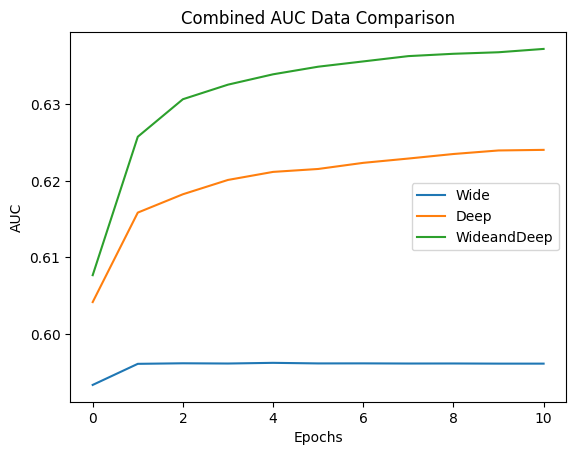

In [26]:
plt.plot(wide_auc, label='Wide')
plt.plot(deep_auc, label='Deep')
plt.plot(wd_auc, label='WideandDeep')

# Adding title and labels
plt.title('Combined AUC Data Comparison')
plt.xlabel('Epochs')
plt.ylabel('AUC')

# Adding legend
plt.legend()

# Show plot
plt.show()

In [31]:
wide_loss_np = [x.cpu().detach().numpy() for x in wide_loss]
deep_loss_np = [x.cpu().detach().numpy() for x in deep_loss]
wd_loss_np = [x.cpu().detach().numpy() for x in wd_loss]

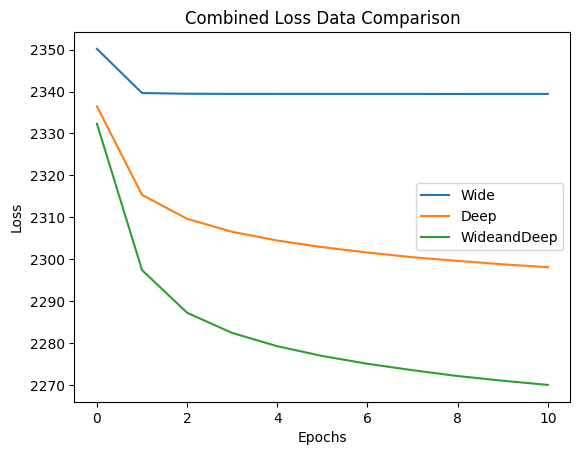

In [33]:
plt.plot(wide_loss_np, label='Wide')
plt.plot(deep_loss_np, label='Deep')
plt.plot(wd_loss_np, label='WideandDeep')

# Adding title and labels
plt.title('Combined Loss Data Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Adding legend
plt.legend()

# Show plot
plt.show()